In [6]:
import os
os.chdir('/rd2/user/xiacr/sle/other_sc_data/')
import numpy as np
import pandas as pd
import scanpy as sc
import harmonypy as hm
import importlib

import glob
import anndata as ad
import collections

import scanpy.external as sce
from mycolorpy import colorlist as mcp

import utils
importlib.reload(utils)

<module 'utils' from '/rd2/user/xiacr/sle/other_sc_data/utils.py'>

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=160, facecolor='white', fontsize=10)
sc._settings.ScanpyConfig.n_jobs = 36

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.0 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


In [4]:
mono_dc = sc.read_h5ad('./output/03-mono_dc_raw.h5ad')
mono_dc = mono_dc.raw.to_adata()

In [5]:
mono_dc

AnnData object with n_obs × n_vars = 433942 × 10619
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'group', 'treatment', 'pair', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'main_type', 'scrublet_doublet', 'subtype', 'RNA_snn_res.0.6', 'RNA_snn_res.1.2', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'barcode', 'dataset', 'sample', 'X', 'index', 'suffix', 'value', 'Run', 'BioSample', 'biospecimen_repository_sample_id', 'Bytes', 'Center.Name', 'Consent_Code', 'Consent', 'DATASTORE.filetype', 'DATASTORE.provider', 'DATASTORE.region', 'Experiment', 'Library.Name', 'Sample.Name', 'sex', 'submitted_subject_id', 'subject_is_affected', 'AvgSpotLen', 'Bases', 'study_disease', 'cell_type', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'main_type_order'
    var: 'vst.mean-0', 'vst.variance-0', 'vst.variance.expected-0

In [ ]:
mono_dc = utils.do_harmony(mono_dc, hvg_batch=False,max_iter_harmony=20,theta=2)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


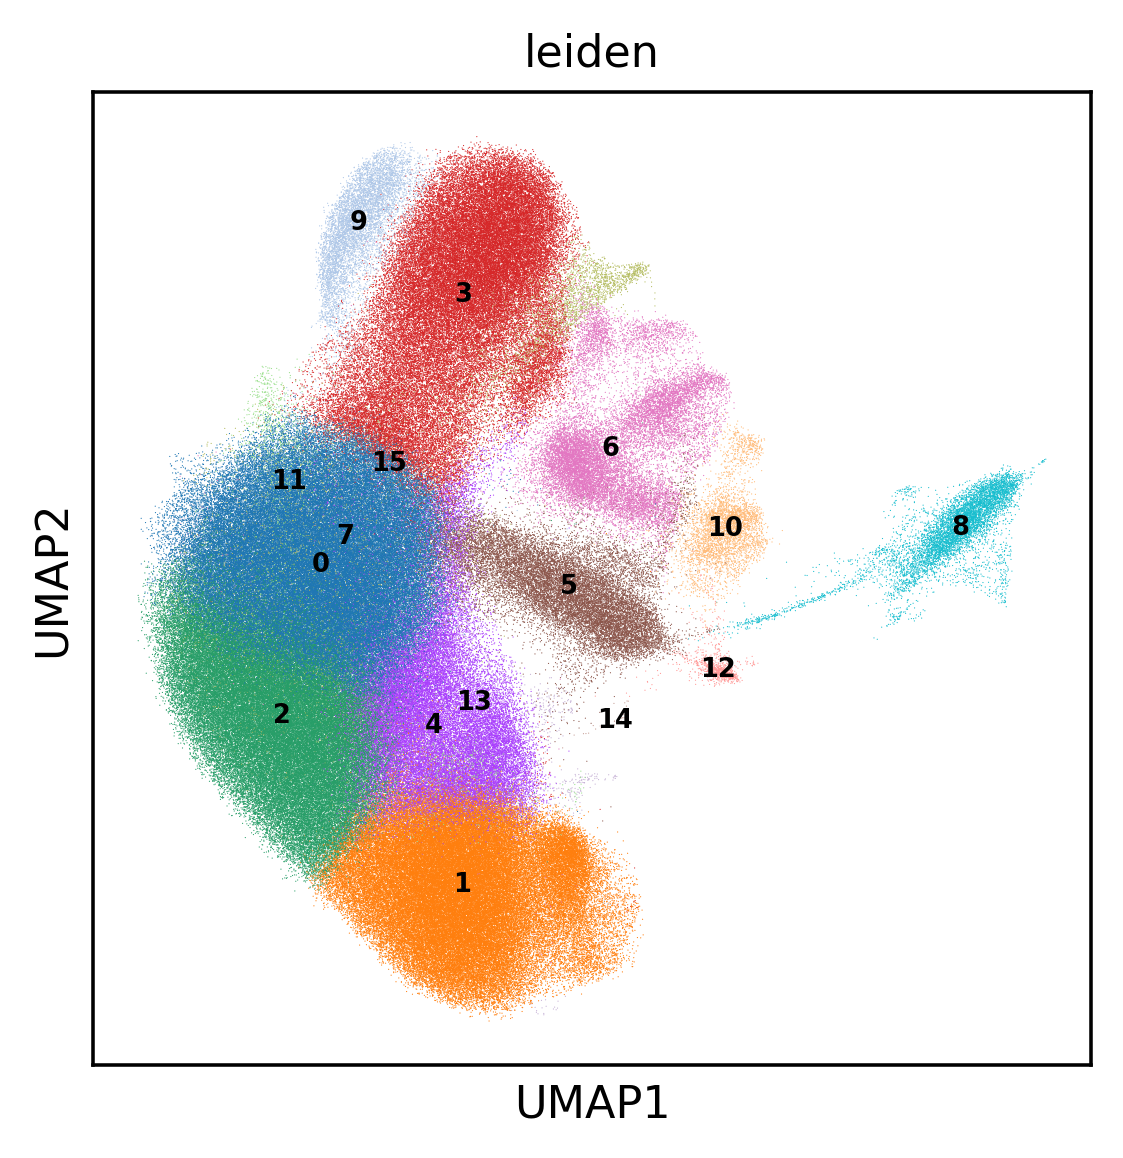

In [10]:
sc.pl.umap(mono_dc,color='leiden',legend_loc='on data', legend_fontsize='xx-small')

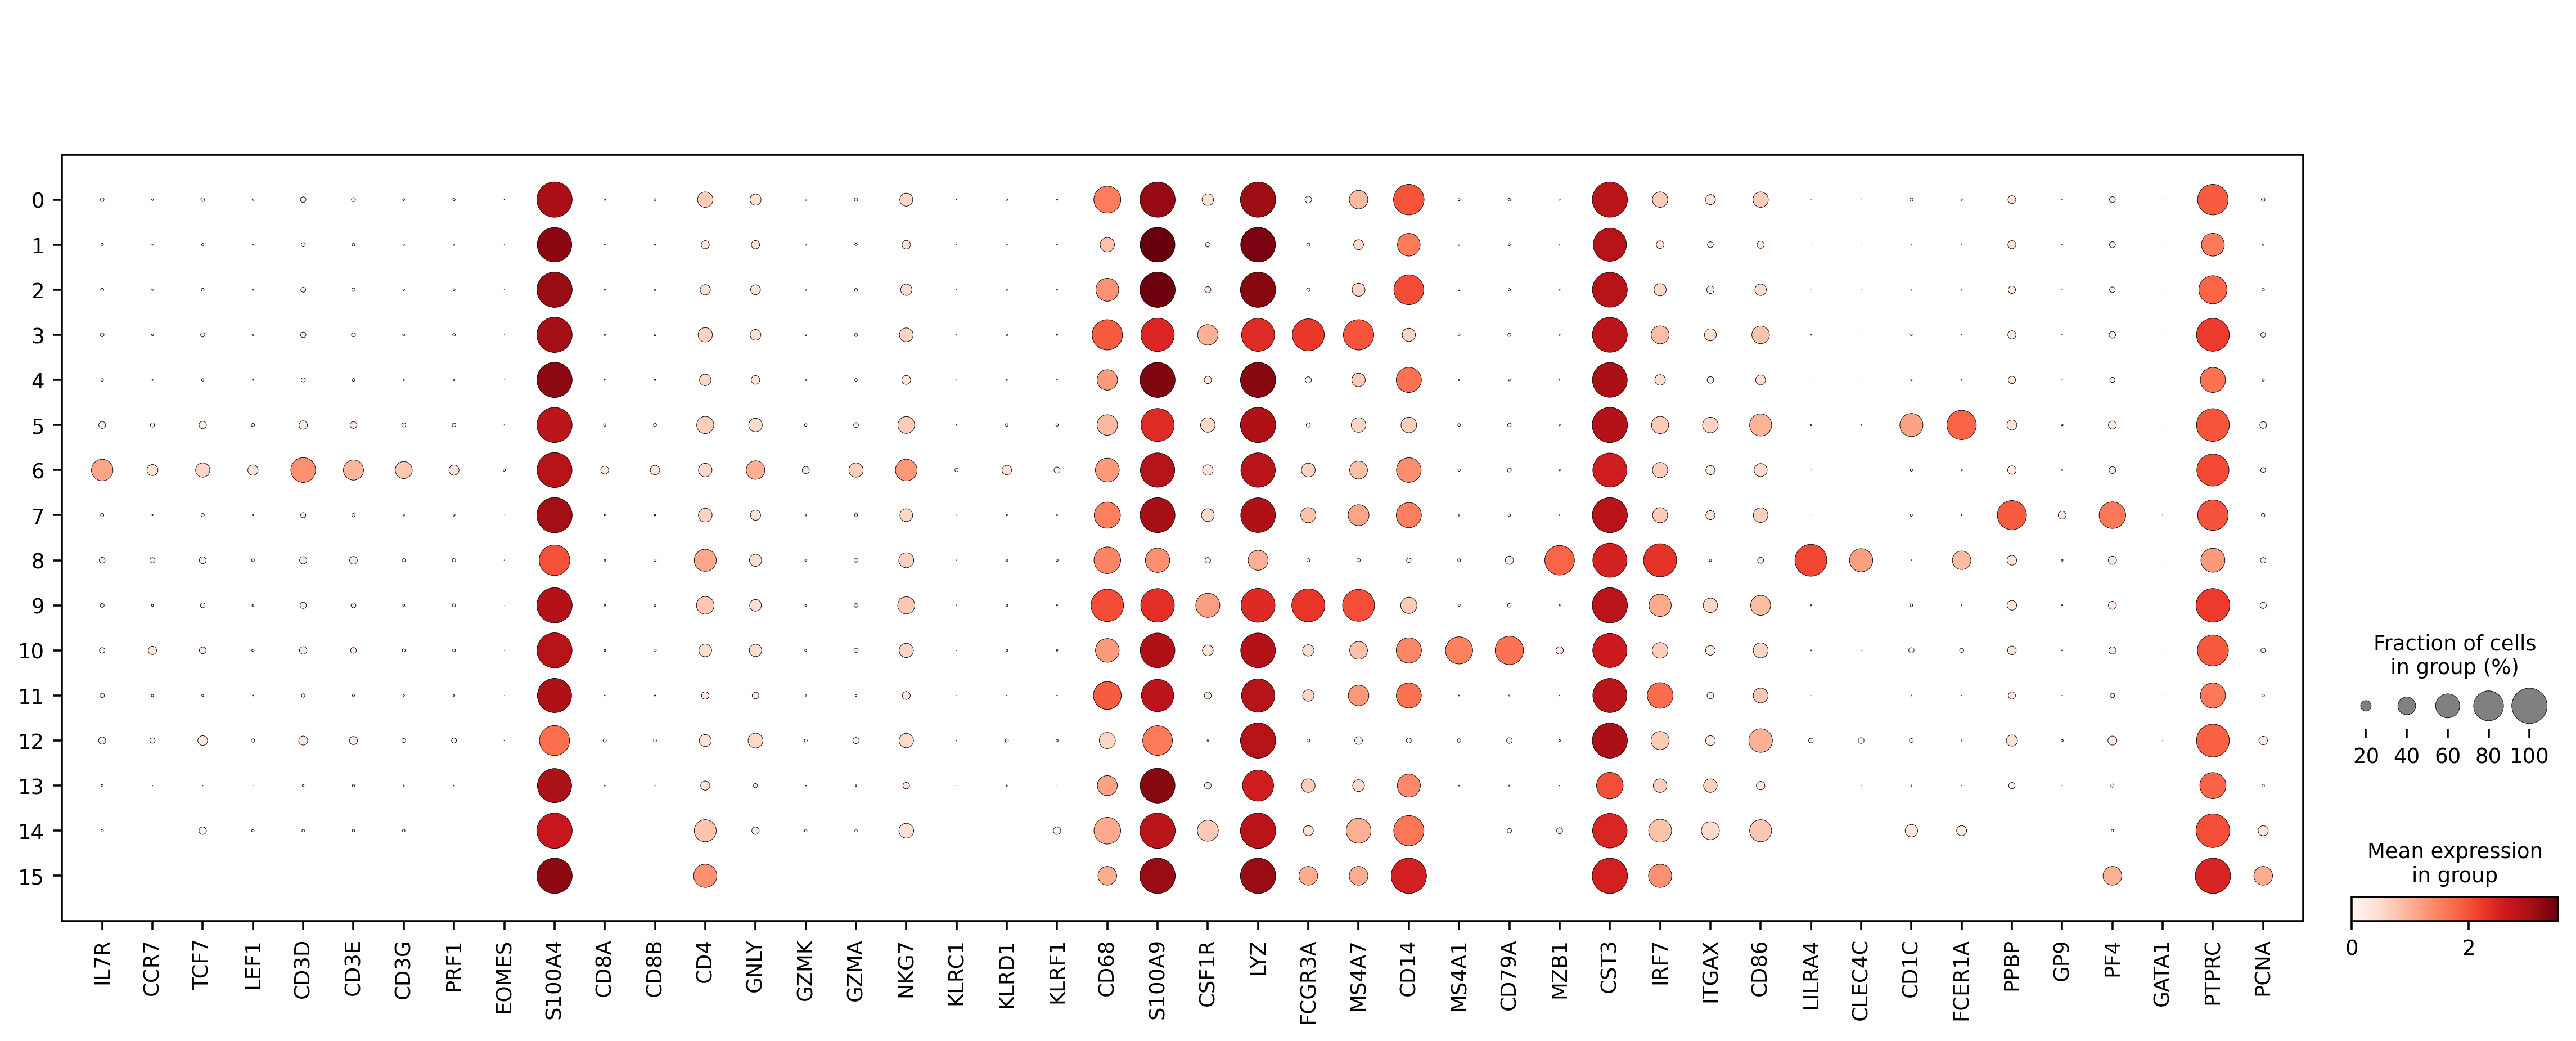

In [9]:
marker_list = [i for i in utils.marker_list if i in mono_dc.raw.var_names]
sc.pl.dotplot(mono_dc, marker_list, groupby='leiden');